In [1]:
### import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'F:\Learn_ai_ml_da\Quora\Raw_data/train.csv')

In [3]:
df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0


In [4]:
df.shape

(404290, 6)

In [5]:
## to get high level view overview of your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

### Distribution of data points among output classes

In [10]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

<AxesSubplot:>

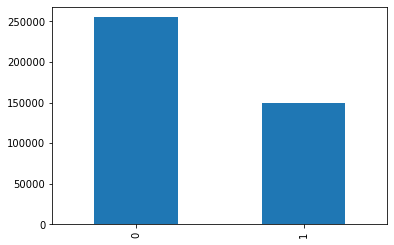

In [9]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [13]:
(df['is_duplicate'].value_counts()/len(df))*100

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64

In [14]:
len(df)

404290

### Number of unique questions 

In [16]:
l1=df['qid1'].tolist()

In [19]:
l2=df['qid2'].tolist()

In [21]:
len(l1+l2)

808580

In [23]:
qids=pd.Series(l1+l2)

In [24]:
qids

0              1
1              3
2              5
3              7
4              9
           ...  
808575    379845
808576    155606
808577    537929
808578    537931
808579    537933
Length: 808580, dtype: int64

In [27]:
## total unique questions
unique_qs=len(np.unique(qids))

In [28]:
unique_qs

537933

### Number of unique questions that appear more than one time

In [30]:
qids.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
212185      1
210136      1
214230      1
220373      1
2047        1
Length: 537933, dtype: int64

In [33]:
qs_morethan_onetime=np.sum(qids.value_counts()>1)

In [34]:
qs_morethan_onetime

111780

In [36]:
qs_morethan_onetime/unique_qs*100

20.77953945937505

### Max number of times a single question is repeated

In [37]:
qids.value_counts()


2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
212185      1
210136      1
214230      1
220373      1
2047        1
Length: 537933, dtype: int64

#### plot Repreated & unique questions

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

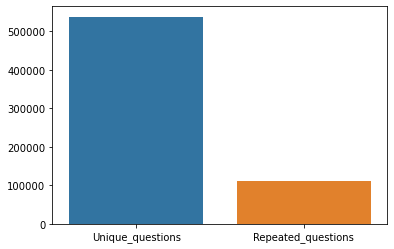

In [38]:
x=['Unique_questions','Repeated_questions']
y=[unique_qs,qs_morethan_onetime]

sns.barplot(x,y)

### Checking for Duplicates 

In [39]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [43]:
#checking whether there are any repeated pair of questions
pair_duplicates=df[['qid1', 'qid2','is_duplicate']].groupby(['qid1', 'qid2']).count()

In [44]:
pair_duplicates

is_duplicate
qid1   qid2                
1      2                  1
3      4                  1
       282170             1
       380197             1
       488853             1
...                     ...
537924 537925             1
537926 537927             1
537928 537929             1
537930 537931             1
537932 537933             1

[404290 rows x 1 columns]

### Number of occurrences of each question 

In [46]:
qids.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
212185      1
210136      1
214230      1
220373      1
2047        1
Length: 537933, dtype: int64

(array([4.26153e+05, 6.47670e+04, 2.12260e+04, 9.34500e+03, 4.86500e+03,
        2.84600e+03, 1.84200e+03, 1.30800e+03, 9.29000e+02, 6.93000e+02,
        5.78000e+02, 4.80000e+02, 3.87000e+02, 3.21000e+02, 2.70000e+02,
        1.99000e+02, 1.92000e+02, 1.87000e+02, 1.53000e+02, 1.54000e+02,
        1.13000e+02, 1.03000e+02, 1.05000e+02, 8.80000e+01, 7.50000e+01,
        5.80000e+01, 6.60000e+01, 4.70000e+01, 3.20000e+01, 3.00000e+01,
        3.50000e+01, 3.60000e+01, 3.90000e+01, 2.00000e+01, 1.80000e+01,
        1.10000e+01, 1.20000e+01, 1.20000e+01, 7.00000e+00, 0.00000e+00,
        8.00000e+00, 2.00000e+01, 1.50000e+01, 1.00000e+01, 8.00000e+00,
        8.00000e+00, 8.00000e+00, 5.00000e+00, 3.00000e+00, 9.00000e+00,
        5.00000e+00, 7.00000e+00, 3.00000e+00, 1.00000e+00, 4.00000e+00,
        4.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00

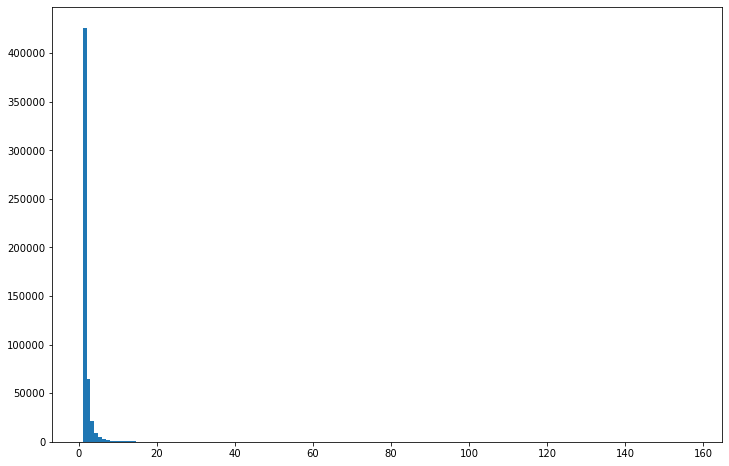

In [48]:
plt.figure(figsize=(12,8))
plt.hist(qids.value_counts(),bins=160)

In [ ]:
### to make this histogfram more clear , u can change y-scale to its log

Text(0, 0.5, 'Number of questions')

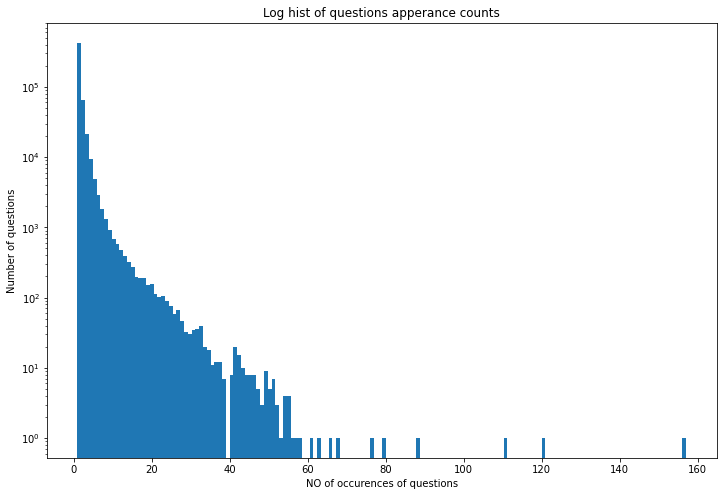

In [50]:
plt.figure(figsize=(12,8))
plt.hist(qids.value_counts(),bins=160)
plt.yscale('log')

plt.title('Log hist of questions apperance counts')
plt.xlabel('NO of occurences of questions')
plt.ylabel('Number of questions')

### Checking for NULL values

In [52]:
df.isnull().any()

id              False
qid1            False
qid2            False
question1        True
question2        True
is_duplicate    False
dtype: bool

In [53]:
## it means 2 features have NAN values
df.isnull().any().sum()

2

In [54]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [56]:
### Lets try to find out rows with null values in question2
df[df['question1'].isnull()]

,id,qid1,qid2,question1,question2,is_duplicate
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [57]:
# Filling the null values with ' '
df.fillna('',inplace=True)

In [58]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

### Text analysis using WordCloud..

In [59]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


In [64]:
train_qs=pd.Series(list(df['question1']) + list(df['question2']))

In [65]:
train_qs

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
808575    How many keywords are there in PERL Programmin...
808576           Is it true that there is life after death?
808577                                    What's this coin?
808578    I am having little hairfall problem but I want...
808579        What is it like to have sex with your cousin?
Length: 808580, dtype: object

In [66]:
train_data_qs=" ".join(train_qs)

In [68]:
len(train_data_qs)

49179886

In [ ]:
#!pip install wordcloud

In [70]:
from wordcloud import WordCloud

In [71]:
cloud=WordCloud(width=1440,height=1080).generate(train_data_qs)

(-0.5, 1439.5, 1079.5, -0.5)

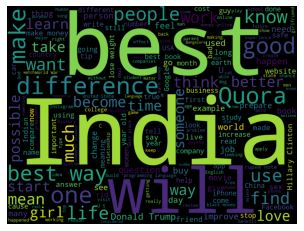

In [73]:
plt.imshow(cloud)
plt.axis('off')

### lets perform Semantic Analysis
    e.g ,,1) How many questions textual contents actually belongs to interrogative sentences?
          2) How many questions textual contents actually holds fullstop?
          3) How many questions textual contents actually holds some special keyword like maths , ml ,ai etc?

In [74]:
train_qs

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
808575    How many keywords are there in PERL Programmin...
808576           Is it true that there is life after death?
808577                                    What's this coin?
808578    I am having little hairfall problem but I want...
808579        What is it like to have sex with your cousin?
Length: 808580, dtype: object

In [75]:
train_qs[0]

'What is the step by step guide to invest in share market in india?'

In [79]:
train_qs[1]

'What is the story of Kohinoor (Koh-i-Noor) Diamond?'

In [76]:
def find_semantics(x,symbol):
    return symbol in x

In [77]:
find_semantics(train_qs[0],'?')

True

In [78]:
find_semantics(train_qs[1],'?')

True

In [80]:
train_qs.apply(find_semantics,args='?')

0         True
1         True
2         True
3         True
4         True
          ... 
808575    True
808576    True
808577    True
808578    True
808579    True
Length: 808580, dtype: bool

In [82]:
np.mean(train_qs.apply(find_semantics,args='?'))*100

99.87385292735412

In [84]:
qmarks=np.mean(train_qs.apply(lambda x:'?' in x))*100

In [85]:
qmarks

99.87385292735412

In [86]:
np.mean(train_qs.apply(lambda x:'.' in x))*100

6.308219347498083

In [87]:
np.mean(train_qs.apply(lambda x:'[math]' in x))*100

0.11736624700091518